In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.cluster import KMeans

In [51]:
df = pd.read_csv('Cust.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


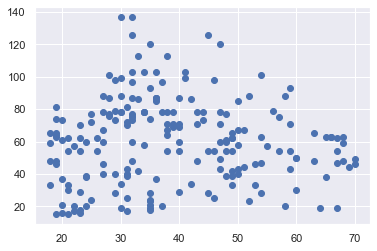

In [52]:
x = df['Age']
y = df['Annual Income (k$)']
plt.scatter(x, y)

In [53]:
asp = df.iloc[:,2:5:2]
asp

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [71]:
kmeans = KMeans(2)
kmeans.fit(asp)

KMeans(n_clusters=2)

In [72]:
identified_clusters = kmeans.fit_predict(asp)

In [73]:
identified_clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [74]:
len(identified_clusters)

200

In [75]:
customer_cluster = df.copy()
customer_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [76]:
customer_cluster['ClusterNo'] = identified_clusters
customer_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterNo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


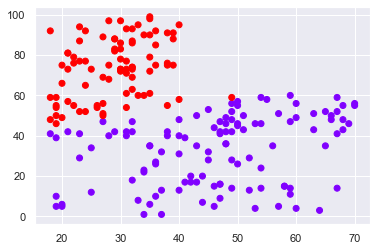

In [77]:
plt.scatter(customer_cluster['Age'],customer_cluster['Spending Score (1-100)'],c=customer_cluster['ClusterNo'],cmap='rainbow')


In [61]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(asp)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [63]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.24505228461,
 19576.013221355326,
 15514.193134351033,
 12997.449288119293,
 11507.02521258762,
 10187.84610136452]

Text(0, 0.5, 'Within-cluster Sum of Squares')

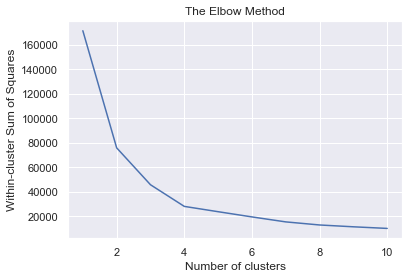

In [62]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')